In [1]:
from IPython.display import display, HTML
from zlib import crc32
import pandas as pd
import numpy as np

In [4]:
def generate_task(code):
    rs = np.random.RandomState(code)
    tasks = pd.read_csv(
        'https://drive.google.com/uc?id=1g-AK3C74K-myj8zKbxk69zXO00roTKh-')

    type_to_id = dict()
    for i in range(len(tasks)):
        _type = tasks.loc[i]['code'].split('_')[0]
        if _type not in type_to_id:
            type_to_id[_type] = []
        type_to_id[_type].append(i)

    list_of_task_id = [rs.choice(type_to_id[_type]) for _type in type_to_id]

    return [{'task': tasks.loc[_loc]['task'],
             'data': tasks.loc[_loc]['data']} 
            for _loc in list_of_task_id]

In [5]:
task = dict()
task['mail'] = input(prompt='Enter your mail: ')
task['id'] = crc32(task['mail'].encode('utf-8'))
task['tasks'] = generate_task(task['id'])

task

Enter your mail: puchkov.k@phystech.edu


{'id': 3366284282,
 'mail': 'puchkov.k@phystech.edu',
 'tasks': [{'data': '1F_FUZ7iUBKeMOhoMhvqjc5Nl7K4g5iE7',
   'task': 'Рассмотрим выборку зависимости числа поломок телефонов (среди всех тестовых образцов, в выборке указано сломался телефон или нет) для пары брендов телефонов (brand-1; brand-2) среди дешевых и дорогих телефонов (high price; low price). Есть ли связь между поломками и ценовым сегментом. Есть ли замечания по данным?'},
  {'data': '1-6J8Jd6yG4ztDL32SIH99rNH4CK9hKw5',
   'task': 'Задана выборка курса обмена иностранной валюты в зависимости от двух переменных: ВВП страны и популярности зеленых гавайских галстуков. Определить, значимы ли эти признаки и их межфакторное взаимодействие для  построения линейное регрессии.'},
  {'data': '1p7gTT3ZfmTIwJg1Tfd8Nflojy1alsfks=',
   'task': 'Рассмотрим задачу аппроксимации уровня продаж мандарин за последние 10 лет. Постройте модель, которая аппроксимирует данный временной ряд при помощи ARIMA. Подберите оптимальные параметры.'}]}

# Задача №1

In [19]:
task_numder = 1
if task['tasks'][task_numder-1]['data'] != '-':
    dataset1 = pd.read_csv(
        'https://drive.google.com/uc?id={}'.format(
            task['tasks'][task_numder-1]['data']))
    print('dataset loaded')
else:
    dataset1 = pd.DataFrame(['not', 'required'])
    print('dataset is not required')
display(HTML('<h3>'+task['tasks'][task_numder-1]['task']+'</h3>'))

dataset loaded


## Решение задачи

In [20]:
dataset1.sample(5)

,price,brand,is_broken
455,high,1,yes
1686,low,1,yes
457,high,1,yes
1028,high,1,no
3319,high,2,no


In [21]:
dataset1.describe(include='all')

,price,brand,is_broken
count,4140,4140.000000,4140
unique,2,NaN,2
top,high,NaN,no
freq,3000,NaN,2095
mean,NaN,1.502415,NaN
std,NaN,0.500055,NaN
min,NaN,1.000000,NaN
25%,NaN,1.000000,NaN
50%,NaN,2.000000,NaN
75%,NaN,2.000000,NaN


In [26]:
import scipy.stats as st

price = dataset1['price'].copy()
price[price == "high"] = 1
price[price == "low"] = 0

broken = dataset1['is_broken'].copy()
broken[broken == "yes"] = 0
broken[broken == "no"] = 1

dataset1['price'] = price
dataset1['is_broken'] = broken

dataset1.sample(5)

,price,brand,is_broken
2580,1,2,0
689,1,1,0
493,1,1,0
430,1,1,0
1052,1,1,1


In [28]:
st.pearsonr(dataset1['price'] , dataset1['is_broken'])

(-0.008777837860702256, 0.572324592139672)

In [29]:
# В случае корреляции Спирмана удаcтся избежать ошибки, связанной с выбросами
st.spearmanr(price, broken)

SpearmanrResult(correlation=-0.008777837860701927, pvalue=0.5723245921415436)

In [30]:
# Аналогично про корреляцию Кендалла
# Точнее оценивается по выборке небольших объемов

st.kendalltau(price, broken)

KendalltauResult(correlation=-0.008777837860701923, pvalue=0.5722623718795733)

**Следовательно, везде данные не противоречат гипотезе о некорреляции. Да и само значение везде близко к нулю.**

# Задача №2

In [ ]:
task_numder = 2
if task['tasks'][task_numder-1]['data'] != '-':
    dataset2 = pd.read_csv(
        'https://drive.google.com/uc?id={}'.format(
            task['tasks'][task_numder-1]['data']))
    print('dataset loaded')
else:
    dataset2 = pd.DataFrame(['not', 'required'])
    print('dataset is not required')
display(HTML('<h3>'+task['tasks'][task_numder-1]['task']+'</h3>'))

dataset loaded


## Решение задачи

In [ ]:
dataset2.sample(5)

,# money,gdp,tie
33,775.4200,861.5700,149.0
7,7.6483,8.4979,615.0
79,500.0600,555.6100,595.0
95,630.1700,700.1900,10.0
58,295.9200,328.8000,93.0


In [ ]:
dataset2.columns = ["money", "gdp", "tie"]
X = dataset2.drop('money', axis=1)
y = dataset2['money']
X

,gdp,tie
0,441.28,550.0
1,734.21,836.0
2,555.99,879.0
3,845.78,632.0
4,909.28,563.0
...,...,...
95,700.19,10.0
96,330.24,639.0
97,917.68,120.0
98,197.85,414.0


In [ ]:
import statsmodels.api as sm

model2 = sm.OLS.from_formula("money ~ gdp*tie", data=dataset2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  money   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.796e+11
Date:                Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:44:59   Log-Likelihood:                 418.83
No. Observations:                 100   AIC:                            -829.7
Df Residuals:                      96   BIC:                            -819.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0014      0.001     -1.158      0.250      -0.004       0.001
gdp            0.9000   2.19e-06   4.11e+05      0.000       0.900       0.900
tie         2.972e-06   2.37e-06      1.257      0.212   -1.72e-06    7.67e-06
gdp:tie     4.607e-08   4.11e-09     11.215      0.000    3.79e-08    5.42e-08
==============================================================================
Omnibus:                        0.457   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.607
Skew:                          -0.127   Prob(JB):                        0.738
Kurtosis:                       2.716   Cond. No.                     1.03e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Значит, галстуки неважны, остальное все важно.

# Задача №3

In [61]:
task_numder = 3
if task['tasks'][task_numder-1]['data'] != '-':
    dataset3 = pd.read_csv(
        'https://drive.google.com/uc?id={}'.format(
            task['tasks'][task_numder-1]['data']))
    print('dataset loaded')
else:
    dataset3 = pd.DataFrame(['not', 'required'])
    print('dataset is not required')
display(HTML('<h3>'+task['tasks'][task_numder-1]['task']+'</h3>'))

dataset loaded


## Решение задачи

In [62]:
dataset3.sample(5)

,t,point
42,7.2013,2.840072
40,5.2013,6.047233
75,4.2016,7.382375
79,8.2016,6.002310
2,3.2010,0.380522


In [63]:
for i in range(len(dataset3['t'])):
  dataset3['t'][i] = i
dataset3.head()

,t,point
0,0.0,2.809679
1,1.0,0.783757
2,2.0,0.380522
3,3.0,1.224148
4,4.0,2.463260


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


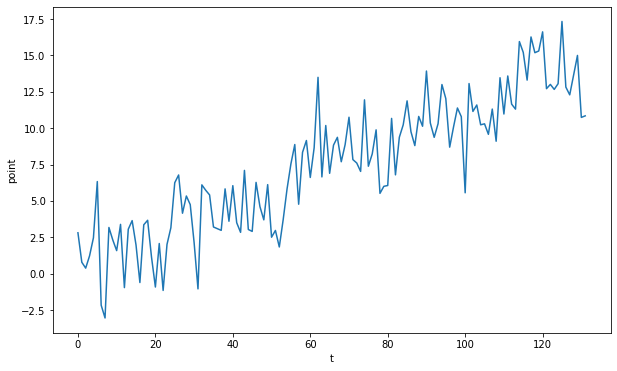

In [64]:
import seaborn as sns

plt.figure(figsize = (10,6))
sns.lineplot(dataset3['t'],dataset3['point'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


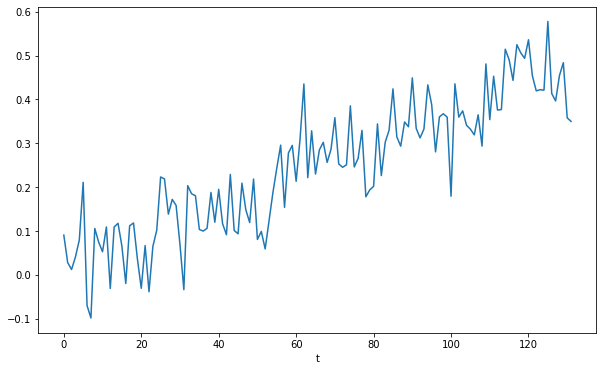

In [65]:
values = dataset3['point'].values.copy()
days = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
for i in range(len(values)):
    values[i]/=days[i%12]


plt.figure(figsize = (10,6))
sns.lineplot(dataset3['t'],values)
plt.show()

Ряд не стал более регулярным, так что это не имело смысла.

In [94]:
data = dataset3.set_index(pd.DatetimeIndex(dataset3['t']))
data.sample(5)

,t,point
t,,
1970-01-01 00:00:00.000000049,49.0,6.117718
1970-01-01 00:00:00.000000023,23.0,2.011134
1970-01-01 00:00:00.000000128,128.0,13.639404
1970-01-01 00:00:00.000000129,129.0,14.995759
1970-01-01 00:00:00.000000002,2.0,0.380522


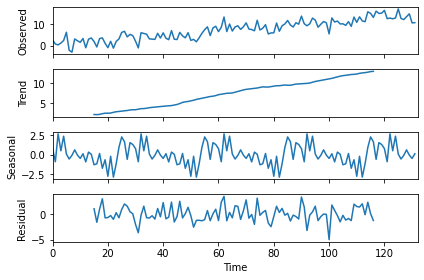

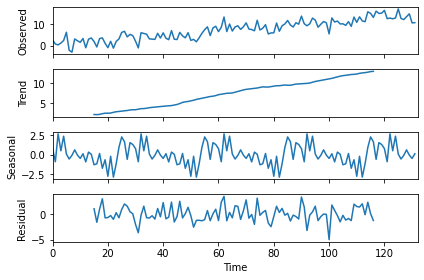

In [103]:
from statsmodels.tsa.seasonal import seasonal_decompose

stl_data = seasonal_decompose(dataset3['point'].values, freq=30)
stl_data.plot()

In [105]:
from statsmodels.tsa.stattools import kpss

kpss(dataset3['point'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(1.0005841771931219,
 0.01,
 13,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

Ряд нестационарен. Проведём дифференцирование:

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.045012059986617045,
 0.1,
 13,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

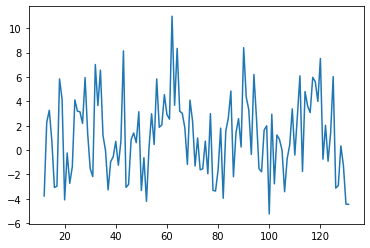

In [108]:
diff_ts = dataset3['point'].diff(12)[12:]
plt.plot(diff_ts)
kpss(diff_ts)

Для полученного ряда гипотеза стационарности не отвергается

Посмотрим на ACF и PACF полученного продифференцированного ряда:

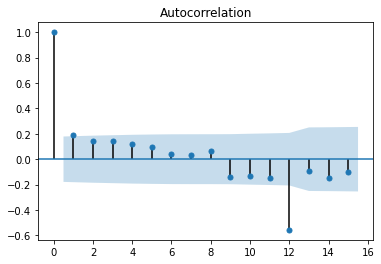

In [111]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(diff_ts, lags=15)
plt.show()

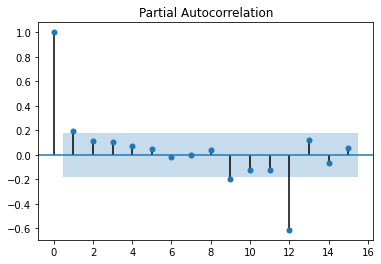

In [112]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(diff_ts, lags=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.15336978903101317,
 0.1,
 13,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

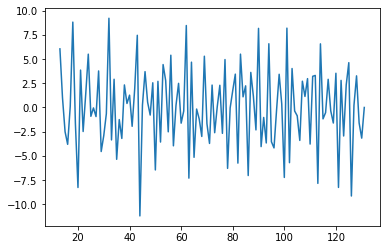

In [114]:
diff_diff_ts = diff_ts.diff(1)[1:]
plt.plot(diff_diff_ts)
kpss(diff_diff_ts)

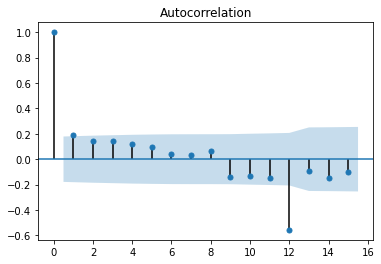

In [116]:
plot_acf(diff_ts, lags=15)
plt.show()

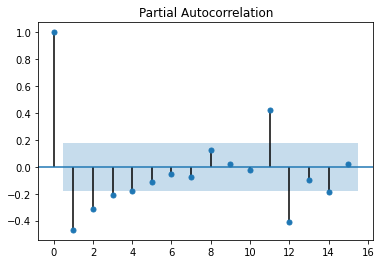

In [115]:
plot_pacf(diff_diff_ts, lags=15)
plt.show()

На ACF значимы лаг 12, на PACF — 1-3. Будем искать модель, оптимальную по AICc, в окрестности ARIMA(3,1,1).

**Не очень понятно, что делать с 11 и 12 на PACF? И на предыдущем дифференцировании так-то только 12 было — что это значит?**

In [128]:
from statsmodels.tsa.arima_model import ARIMA

for i in range(-3,2):
    for k in range(-1, 2):
      for p in range(-1, 2):
        order = (3+i,1+k,1+p)
        try:
            arima = ARIMA(dataset3['point'].values, order=order).fit()
            print(arima.aic)
        except:
            pass

780.0054352921779
712.0049508239454
687.6567982546509
644.356116343817
581.0407481092327
580.4240341165391
777.0807183748182
647.3345780570601
639.3382664895468
596.5770755261993
619.3360505832304
580.4552224219788


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


582.3831211905413
718.7690114657121
621.8979293680771


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: Converge

665.29610044282
600.7160786874392
582.4552100246688


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


583.7434344656151
681.1297154544059
606.8564934614861


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:695: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


667.4615313890267
593.5009258097136
582.2993507231639


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


585.7130569594966
654.8447328332741
598.6830322742428
601.2708249020317


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:693: RuntimeWarning: invalid value encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)


593.2199204277908
583.0140836838457
585.0917540403152
641.8510121686892
598.6556103144582


Нулевая апроксимирует лучшего всего?

In [130]:
for i in range(-1,2):
    for k in range(-1, 2):
        order = (3+i,1,1+k)
        try:
            arima = ARIMA(dataset3['point'].values, order=order).fit()
            print(arima.aic)
        except:
            pass

600.7160786874392
582.4552100246688


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


583.7434344656151
593.5009258097136
582.2993507231639


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


585.7130569594966
593.2199204277908
583.0140836838457
585.0917540403152


Если делать как на семинаре, то все равно получается минимальная степень (2, 1, 0)

In [135]:
arima = ARIMA(dataset3['point'].values, order=(2,1,0)).fit()
print(arima.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  131
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -296.358
Method:                       css-mle   S.D. of innovations              2.319
Date:                Tue, 27 Apr 2021   AIC                            600.716
Time:                        18:59:11   BIC                            612.217
Sample:                             1   HQIC                           605.389
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0763      0.103      0.743      0.459      -0.125       0.278
ar.L1.D.y     -0.5992      0.081     -7.414      0.000      -0.758      -0.441
ar.L2.D.y     -0.3841      0.081     -4.741      0.0

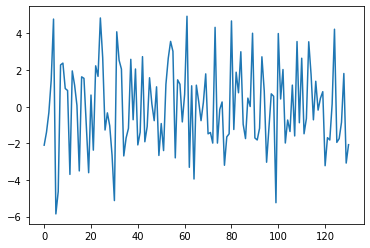

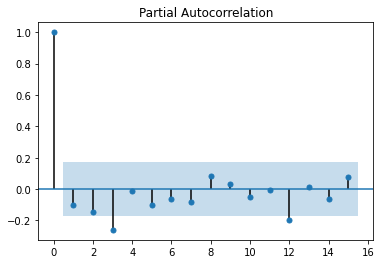

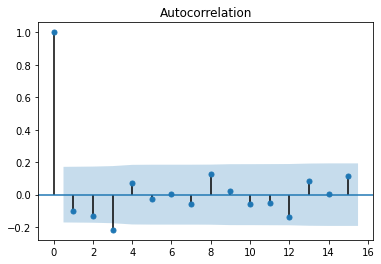

In [136]:
plt.plot(arima.resid)
plot_pacf(arima.resid, lags=15)
plot_acf(arima.resid, lags=15)

plt.show()

In [141]:
for i in range(-1,2):
    for k in range(-1, 2):
        order = (3+i,1,1+k)
        try:
            arima = ARIMA(dataset3['point'].values, order=order, seasonal_order=(1, 1, 1, 12)).fit()
            print(arima.aic)
        except:
            pass

Ничего? И как это понимать?